# Complex Dynamics of a Three Species Ecosystem

- Author: Ramsey (Rayla) Phuc
  - Alias: Rayla Kurosaki
  - GitHub: https://github.com/rkp1503
- Co-author: Ephraim Agyingi

```
pip install matplotlib, numpy, scipy, sympy
```

```
python code_python/main.py
```

In [1]:
#-----------------------------------------------------------------------------
# This block of code imports relevant libraries that are needed to run this 
# notebook.
#-----------------------------------------------------------------------------
import sympy as sym

from utils import equilibria_existance as eq_exist
from utils import utils

sym.init_printing()

In [2]:
#-----------------------------------------------------------------------------
# This block of code initializes all variables and parameters mentioned in the paper.
#-----------------------------------------------------------------------------

# Density of species X
x = sym.symbols("x")
# Density of species Y
y = sym.symbols("y")
# Density of species Z
z = sym.symbols("z")
# Time variable
t = sym.symbols("t")

# Ratio of intrinsic growth rate of species Y to species X
r_yx = sym.symbols("r_yx")
# Ratio of intrinsic growth rate of species Z to species X
r_zx = sym.symbols("r_zx")
# Refuge rate of Species Y
p = sym.symbols("p")
# Scaled inter-species competition coefficient of species Y on species X
phi_xy = sym.symbols("varphi_xy")
# Scaled inter-species competition coefficient of species X on species Y
phi_yx = sym.symbols("varphi_yx")
# Scaled commensal coefficient of species Z on species X
phi_xz = sym.symbols("varphi_xz")
# Scaled rate at which species Z attacks species Y
u_1 = sym.symbols("u_1")
# Scaled half saturation constant for Holling type II function
u_2 = sym.symbols("u_2")
# Scaled conservation rate of species Y
u_3 = sym.symbols("u_3")
# Scaled death rate of species Z
u_4 = sym.symbols("u_4")

# 
labels_colors_dict = {
    x: ["X", "Black"],
    y: ["Y", "Red"],
    z: ["Z", "Blue"],
}

In [3]:
#-----------------------------------------------------------------------------
# This block of code contains parameters that the user can manipulate.
#-----------------------------------------------------------------------------
# 
vars_dict = {
    # Density of species X 
    x: 0.7,
    # Density of species Y
    y: 0.4,
    # Density of species Z
    z: 0.2,
}
# 
params_dict = {
    # Ratio of intrinsic growth rate of species Y to species X
    r_yx: 0.5,
    # Ratio of intrinsic growth rate of species Z to species X
    r_zx: 0.12,
    # Refuge rate of species Y
    p: 0.3,
    # Scaled inter-species mutualism coefficient of species Y on species X
    phi_xy: 0.6,
    # Scaled inter-species competition coefficient of species X on species Y
    phi_yx: 0.15,
    # Scaled commensal coefficient of species Z on species X
    phi_xz: 0.4,
    u_1: 0.6,
    # Scaled half saturation constant for Holling type II function
    u_2: 0.08,
    # Scaled conservation rate of species Y
    u_3: 0.5,
    # Scaled death rate of species Z
    u_4: 0.5,
}
# Number of days to model.
t_max = 500
# 
show_equilibria = False
show_stability = False

## Proposed Model:
$$
\begin{align*}
	\frac{\textrm{d}x}{\textrm{d}t} &= x\left(1-x+\varphi_{xy}y^2\right)+\varphi_{xz}xz\\
	\frac{\textrm{d}y}{\textrm{d}t} &= r_{yx}y\left(1-y+\varphi_{yz}x^2\right)-\frac{u_1\left(1-p\right)yz}{u_2+\left(1-p\right)y}\\
	\frac{\textrm{d}z}{\textrm{d}t} &= r_{zx}z\left(1-z\right)+z\left(\frac{u_3\left(1-p\right)y}{u_2+\left(1-p\right)y}-u_4\right)
\end{align*}
$$

In [4]:
def model(variables, t, *parameters):
    x, y, z = variables
    r_yx, r_zx, p, phi_xy, phi_yx, phi_xz, u_1, u_2, u_3, u_4 = parameters[0] if len(parameters) == 1 else parameters
    dx = x*(1-x+phi_xy*y**2)-phi_xz*x*z
    dy = r_yx*y*(1-y+phi_yx*x**2)-((u_1*(1-p)*y*z)/(u_2+(1-p)*y))
    dz = r_zx*z*(1-z)+z*(((u_3*(1-p)*y)/(u_2+(1-p)*y))-u_4)
    return [dx, dy, dz]

## The existance of equilibria

In [5]:
equilibria = []

### The trivial equilibrium

In [6]:
if show_equilibria:
    E_0 = utils.compute_equilibria(model, vars_dict, params_dict, equilibria, [0, 0, 0])
    if E_0 is None:
        print("The trivial equilibrium does not exist!")
        pass
    else:
        display(tuple(E_0.values()))
        equilibria.append(E_0)
        pass
    pass

### The $x$-axial equilibrium

In [7]:
if show_equilibria:
    E_x = utils.compute_equilibria(model, vars_dict, params_dict, equilibria, [x, 0, 0])
    if E_x is None:
        print("The x-axial equilibrium does not exist!")
        pass
    else:
        display(tuple(E_x.values()))
        equilibria.append(E_x)
        pass
    pass

### The $y$-axial equilibrium

In [8]:
if show_equilibria:
    E_y = utils.compute_equilibria(model, vars_dict, params_dict, equilibria, [0, y, 0])
    if E_y is not None:
        display(tuple(E_y.values()))
        equilibria.append(E_y)
        pass
    else:
        print("The y-axial equilibrium does not exist!")
        pass
    pass

### The $z$-axial equilibrium

In [9]:
if show_equilibria:
    E_z = utils.compute_equilibria(model, vars_dict, params_dict, equilibria, [0, 0, z])
    if E_z is not None:
        display(tuple(E_z.values()))
        equilibria.append(E_z)
        pass
    else:
        print("The z-axial equilibrium does not exist!")
        pass
    pass

### The $xy$-boundary equilibrium

In [10]:
if show_equilibria:
    E_xy = eq_exist.xy_boundary(vars_dict, params_dict, [x, y, 0])
    if E_xy is not None:
        display(tuple(E_xy.values()))
        equilibria.append(E_xy)
        pass
    else:
        print("The xy-boundary equilibrium does not exist!")
        pass
    pass

### The $xz$-boundary equilibrium

In [11]:
if show_equilibria:
    E_xz = utils.compute_equilibria(model, vars_dict, params_dict, equilibria, [x, 0, z])
    if E_xz is not None:
        display(tuple(E_xz.values()))
        equilibria.append(E_xz)
        pass
    else:
        print("The xz-boundary equilibrium does not exist!")
        pass
    pass

### The $yz$-boundary equilibrium

In [12]:
if show_equilibria:
    E_yz = eq_exist.yz_boundary(vars_dict, params_dict, [0, y, z])
    if E_yz is not None:
        display(tuple(E_yz.values()))
        equilibria.append(E_yz)
        pass
    else:
        print("The yz-boundary equilibrium does not exist!")
        pass
    pass

### The interior equilibrium

In [13]:
if show_equilibria:
    E_xyz = eq_exist.interior(vars_dict, params_dict, [x, y, z])
    if E_xyz is not None:
        display(tuple(E_xyz.values()))
        equilibria.append(E_xyz)
        pass
    else:
        print("The interior equilibrium does not exist!")
        pass
    pass

### Displaying equilibria

In [14]:
if show_equilibria:
    for equilibrium in equilibria:
        display(tuple(equilibrium.values()))
        pass
    pass

## Stability analysis of Equilibria

\begin{equation*}
    \textbf{J}\left(E_i\right)=\textbf{J}\left(x_i^*,\ y_i^*,\ z_i^*\right)=\begin{bmatrix}
        j_{11} & j_{12} & j_{13}\\
        j_{21} & j_{22} & j_{23}\\
        0 & j_{32} & j_{33}
    \end{bmatrix}
\end{equation*}

where

\begin{align*}
    j_{11} &= 1-2x_i^*+\gamma_{12}\left(y_i^*\right)^2-\gamma_{13}z_i^*\\
    j_{12} &= 2\gamma_{12}x_i^*y_i^*\\
    j_{13} &= -\gamma_{13}x_i^*\\
    j_{21} &= 2\gamma_{21}r_1x_i^*y_i^*\\
    j_{22} &= r_1\left(1-2y_i^*+\gamma_{21}\left(x_i^*\right)^2\right)-\frac{v_1\left(1-p\right)z_i^*}{\left(v_1+\left(1-p\right)y_i^*\right)^2}\\
    j_{23} &= -\frac{\left(1-p\right)y_i^*}{v_1+\left(1-p\right)y_i^*}\\
    j_{32} &= \frac{v_1v_3\left(1-p\right)z_i^*}{\left(v_1+\left(1-p\right)y_i^*\right)^2}\\
    j_{33} &= r_2\left(1-2\gamma_{31}z_i^*\right)+\frac{v_3\left(1-p\right)y_i^*}{v_1+\left(1-p\right)y_i^*}-v_2
\end{align*}

### The trivial equilibrium

In [15]:
if show_stability:
    jacobian, jacobian_s = utils.construct_jacobian(model, vars_dict, params_dict, E_0)
    utils.stability_analysis(jacobian, jacobian_s)
    pass

### The $x$-axial equilibrium

In [16]:
if show_stability:
    jacobian, jacobian_s = utils.construct_jacobian(model, vars_dict, params_dict, E_x)
    utils.stability_analysis(jacobian, jacobian_s)
    pass

### The $y$-axial equilibrium

In [17]:
if show_stability:
    jacobian, jacobian_s = utils.construct_jacobian(model, vars_dict, params_dict, E_y)
    utils.stability_analysis(jacobian, jacobian_s, compact=True)
    pass

### The $z$-axial equilibrium

In [18]:
if show_stability:
    jacobian, jacobian_s = utils.construct_jacobian(model, vars_dict, params_dict, E_z)
    utils.stability_analysis(jacobian, jacobian_s, compact=True)
    pass

### The $xy$-boundary equilibrium

In [19]:
if show_stability:
    jacobian, jacobian_s = utils.construct_jacobian(model, vars_dict, params_dict, E_xy)
    utils.stability_analysis(jacobian, jacobian_s, compact=True, method="RHC")
    pass

### The $xz$-boundary equilibrium

In [20]:
if show_stability:
    jacobian, jacobian_s = utils.construct_jacobian(model, vars_dict, params_dict, E_xz)
    utils.stability_analysis(jacobian, jacobian_s, compact=True)
    pass

### The $yz$-boundary equilibrium

In [21]:
if show_stability:
    jacobian, jacobian_s = utils.construct_jacobian(model, vars_dict, params_dict, E_yz)
    utils.stability_analysis(jacobian, jacobian_s, compact=True, method="RHC")
    pass

### The interior equilibrium

In [22]:
if show_stability:
    jacobian, jacobian_s = utils.construct_jacobian(model, vars_dict, params_dict, E_xyz)
    utils.stability_analysis(jacobian, jacobian_s, compact=True, method="RHC")
    pass

## Numerical analysis of stable equilibria
### The $z$-axial equilibrium

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


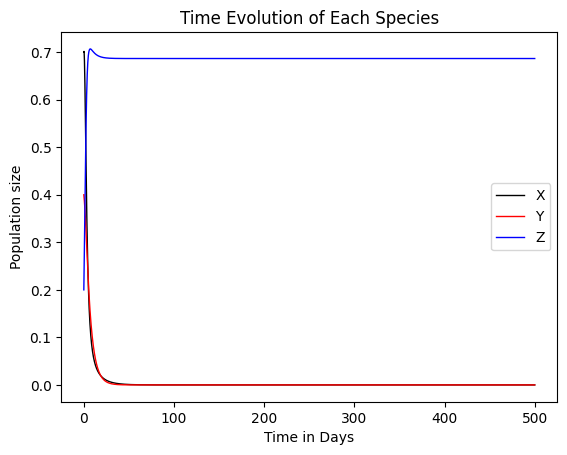

In [23]:
param_values = [0.007, 1.136, 0.874, 0.318, 0.416, 1.59, 1.655, 0.791, 0.994, 0.356]

ts, sol = utils.solve_model(model, t_max, vars_dict, param_values)

title = "Time Evolution of Each Species"
xaxis = "Time in Days"
yaxis = "Population size"

filename = "equilibrium-axial-z"

utils.my_plot(ts, sol, title, xaxis, yaxis, labels_colors_dict, filename=filename)

### The $xy$-boundary equilibrium

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


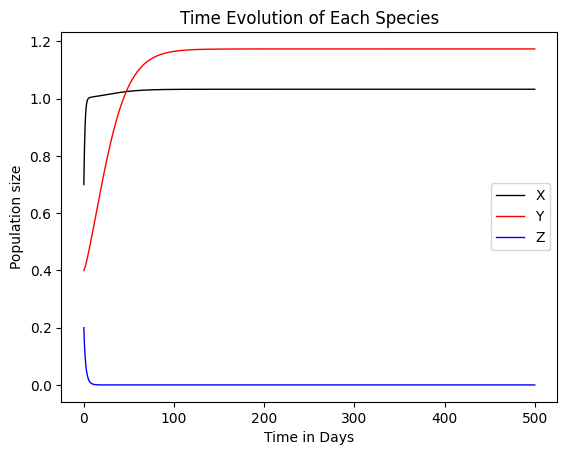

In [24]:
param_values = [0.049, 0.467, 0.645, 0.024, 0.163, 0.031, 0.31, 0.978, 0.9, 1.004]

ts, sol = utils.solve_model(model, t_max, vars_dict, param_values)

filename = "equilibrium-boundary-xy"

utils.my_plot(ts, sol, title, xaxis, yaxis, labels_colors_dict, filename=filename)

### The $xz$-boundary equilibrium

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


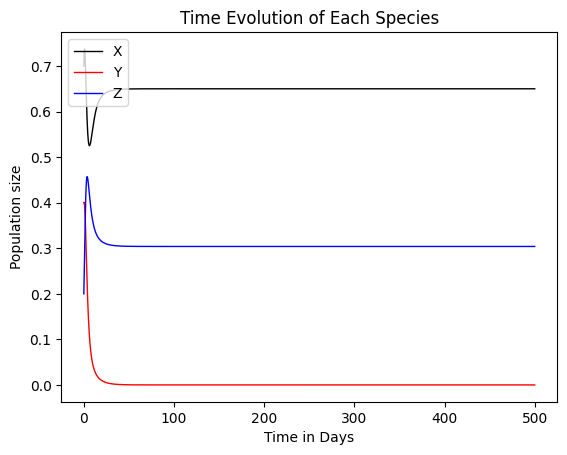

In [25]:
param_values = [0.199, 1.494, 0.482, 0.449, 0.993, 1.152, 1.671, 0.663, 1.556, 1.04]

ts, sol = utils.solve_model(model, t_max, vars_dict, param_values)

filename = "equilibrium-boundary-xz"

utils.my_plot(ts, sol, title, xaxis, yaxis, labels_colors_dict, filename=filename)

### The $yz$-boundary equilibrium

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


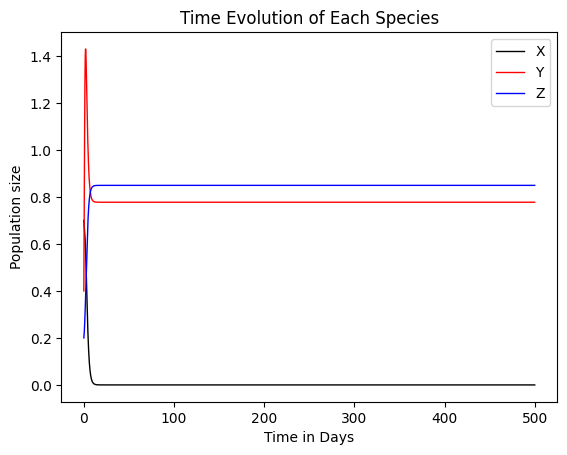

In [26]:
param_values = [1.219, 0.452, 0.589, 0.047, 1.587, 1.908, 1.658, 1.812, 1.473, 0.289]

ts, sol = utils.solve_model(model, t_max, vars_dict, param_values)

filename = "equilibrium-boundary-yz"

utils.my_plot(ts, sol, title, xaxis, yaxis, labels_colors_dict, filename=filename)

### The interior equilibrium

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


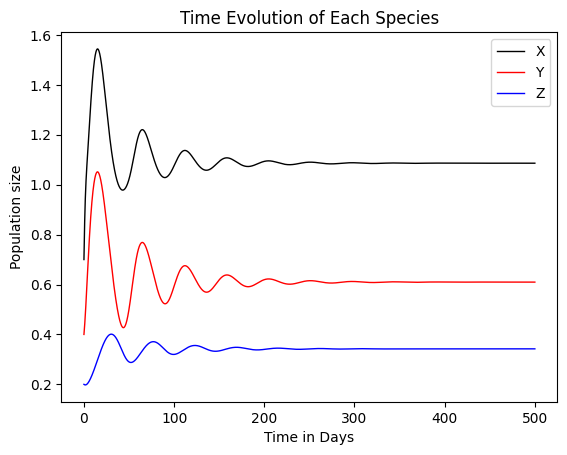

In [27]:
param_values = list(params_dict.values())

ts, sol = utils.solve_model(model, t_max, vars_dict, param_values)

filename = "equilibrium-interior-time-evolution"

utils.my_plot(ts, sol, title, xaxis, yaxis, labels_colors_dict, filename=filename)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


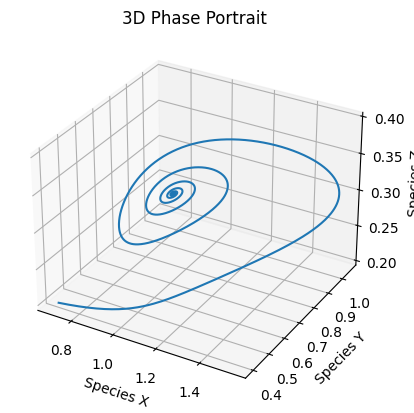

In [28]:
sol_x, sol_y, sol_z = [sol[:, i] for i in range(len(vars_dict))]

title = "3D Phase Portrait"
xaxis = "Species X"
yaxis = "Species Y"
zaxis = "Species Z"

filename = "equilibrium-interior-pp-xyz"

utils.my_3D_phase_portrait(sol, title, xaxis, yaxis, zaxis, filename=filename)

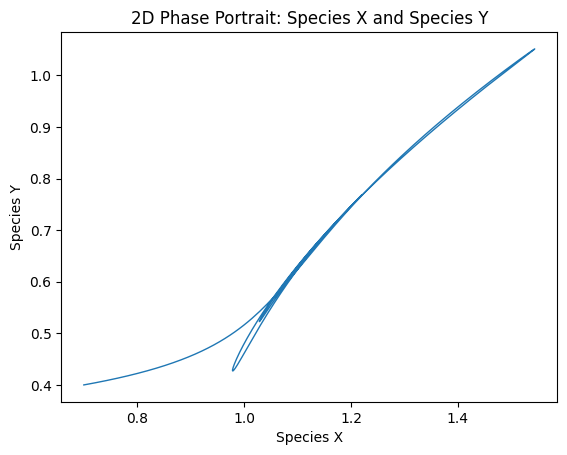

In [29]:
title = f"2D Phase Portrait: {xaxis} and {yaxis}"

filename = "equilibrium-interior-pp-xy"

utils.my_2D_phase_portrait(sol_x, sol_y, title, xaxis, yaxis, filename=filename)

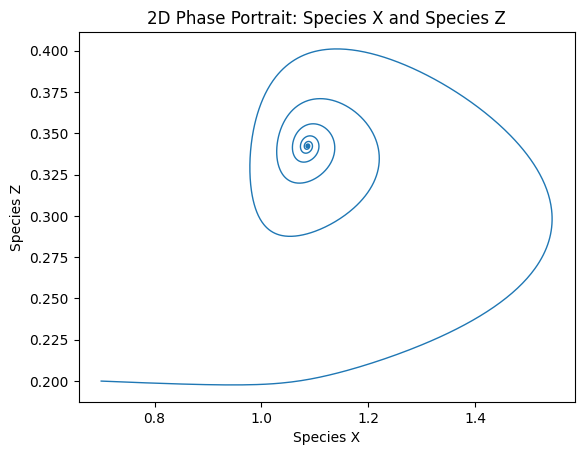

In [30]:
title = f"2D Phase Portrait: {xaxis} and {zaxis}"

filename = "equilibrium-interior-pp-xz"

utils.my_2D_phase_portrait(sol_x, sol_z, title, xaxis, zaxis, filename=filename)

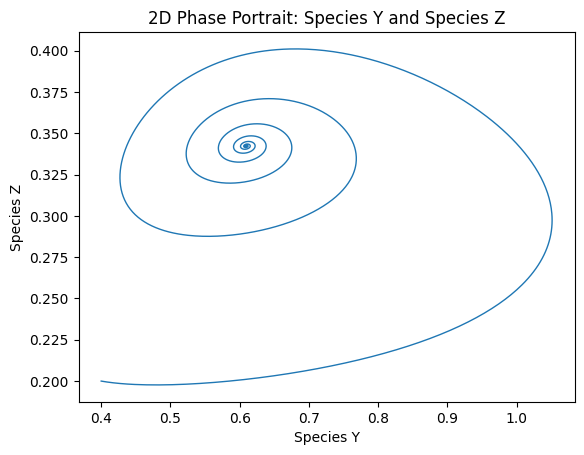

In [31]:
title = f"2D Phase Portrait: {yaxis} and {zaxis}"

filename = "equilibrium-interior-pp-yz"

utils.my_2D_phase_portrait(sol_y, sol_z, title, yaxis, zaxis, filename=filename)